In [159]:
##Autor Plata Luna Iveth Vanessa
##Primer cambio
##Importamos la librería para el uso del puerto serial y time par el menejo del tiempo.
import serial
import time

In [160]:
##El programa se conecta al puerto serial COM6 a 9600 baudios dando tiempos de demora para recibir datos.
serialArduino= serial.Serial("COM6", 9600 )
time.sleep(1)


In [161]:
#La variable cad almacenará de manera temporal los datos obtenidos del puerto serial.
cad =""

In [162]:
#Definimos una lista para almacenar los datos del puerto serial. La variable i es de control.
lista=[]
i = 0

In [163]:
#Segmento de código que obtiene datos desde el puerto serial y lo transforma a ASCII. El bucle termina hasta que se obtene una 'f'
while not(cad[0:1] == 'f') :
    cad = serialArduino.readline().decode('ascii')
    print(cad)
    if not(cad[0:1] == 'f'):
        lista.append(cad)
        i=i+1

R1rD19dG46g

R2rD8dG86g

R3rD19dG130g

R4rD14dG210g

R5rD18dG273g

R6rD14dG320g

f



In [164]:

print(cad)

f



In [165]:
print(lista)

['R1rD19dG46g\r\n', 'R2rD8dG86g\r\n', 'R3rD19dG130g\r\n', 'R4rD14dG210g\r\n', 'R5rD18dG273g\r\n', 'R6rD14dG320g\r\n']


In [166]:
print(i)

6


In [167]:
#La definición de estas listas es para almacenar los datos obtenidos del puerto serial, previamente se decodifican.
objeto=[]
distancia=[]
grados=[]


In [168]:
#Definimos listas que servirán a decodificar la información del puerto serial.
indexO = []
indexo= []
indexD = []
indexd = []
indexG = []
indexg = []
numDigO = []
numDigD = []
numDigG = []
objetoS=[]
distanciaS=[]
gradosS=[]

#Segmento de código que decodifica las cadenas de caracter obtenidas desde el puerto serial.
#Se utiliza funciones para la manipulación de cadenas, como buscar un caracter y extraer subcadenas. 
#Los resultados obtenidos se almacenan en listas.
for n in range(0, len(lista), 1):
    print(lista[n])
    cadena=lista[n]
       
    indexO.append(cadena.find('R'))
    indexo.append(cadena.find('r'))
    indexD.append( cadena.find('D'))
    indexd.append(cadena.find('d'))
    indexG.append(cadena.find('G'))
    indexg.append(cadena.find('g'))
    
    numDigO.append (indexo[n] - indexO[n] - 1)
    numDigD.append (indexd[n] - indexD[n] - 1)
    numDigG.append (indexg[n] - indexG[n] - 1)
    
    objetoS.append(cadena[(indexO[n]+1):(indexO[n]+1+numDigO[n])])
    distanciaS.append(cadena[(indexD[n]+1):(indexD[n]+1+numDigD[n])])
    gradosS.append(cadena[(indexG[n]+1):(indexG[n]+1+numDigG[n])])


print("índice de caracteres")
print(indexO)
print(indexo)
print(indexD)
print(indexd)
print(indexG)
print(indexg)
print("Número de dígitos")
print(numDigO)
print(numDigD)
print(numDigG)
print("Resultados")
print(objetoS)
print(distanciaS)
print(gradosS)

R1rD19dG46g

R2rD8dG86g

R3rD19dG130g

R4rD14dG210g

R5rD18dG273g

R6rD14dG320g

índice de caracteres
[0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3]
[6, 5, 6, 6, 6, 6]
[7, 6, 7, 7, 7, 7]
[10, 9, 11, 11, 11, 11]
Número de dígitos
[1, 1, 1, 1, 1, 1]
[2, 1, 2, 2, 2, 2]
[2, 2, 3, 3, 3, 3]
Resultados
['1', '2', '3', '4', '5', '6']
['19', '8', '19', '14', '18', '14']
['46', '86', '130', '210', '273', '320']


In [169]:
#En este segmento de código se convierten las coordenadas polares a coordenadas cartesianas.
#Para esta función utilizamos la libreria math.
import math
objeto = []
distancia = []
grados = []

for n in range(0, len(lista), 1):
    
    objeto.append (int (objetoS[n]))
    distancia.append (int (distanciaS[n]))
    grados.append(int (gradosS[n]))

x=[]
y=[]
for n in range(0, len(lista), 1):
    x.append(distancia[n] * math.cos(math.radians(grados[n])));
    y.append(distancia[n] * math.sin(math.radians(grados[n])));
print(objeto)
print(distancia)
print(grados)
print(x)
print(y)

[1, 2, 3, 4, 5, 6]
[19, 8, 19, 14, 18, 14]
[46, 86, 130, 210, 273, 320]
[13.198509038720948, 0.5580517899530019, -12.212964584044247, -12.12435565298214, 0.942047212372991, 10.724622203665689]
[13.667456206434373, 7.980512402078594, 14.554844419260583, -7.000000000000002, -17.975331625582328, -8.999026535611554]


In [170]:
#Para graficar utilizamos las librerias mumpy y matplotlib.
import numpy as np
import matplotlib.pyplot as plt


In [171]:
#Es importante convertir la lista a un tipo arreglo para poder graficar.
xnp = np.array(x)
ynp = np.array(y)
print(xnp)
print(ynp)

[ 13.19850904   0.55805179 -12.21296458 -12.12435565   0.94204721
  10.7246222 ]
[ 13.66745621   7.9805124   14.55484442  -7.         -17.97533163
  -8.99902654]


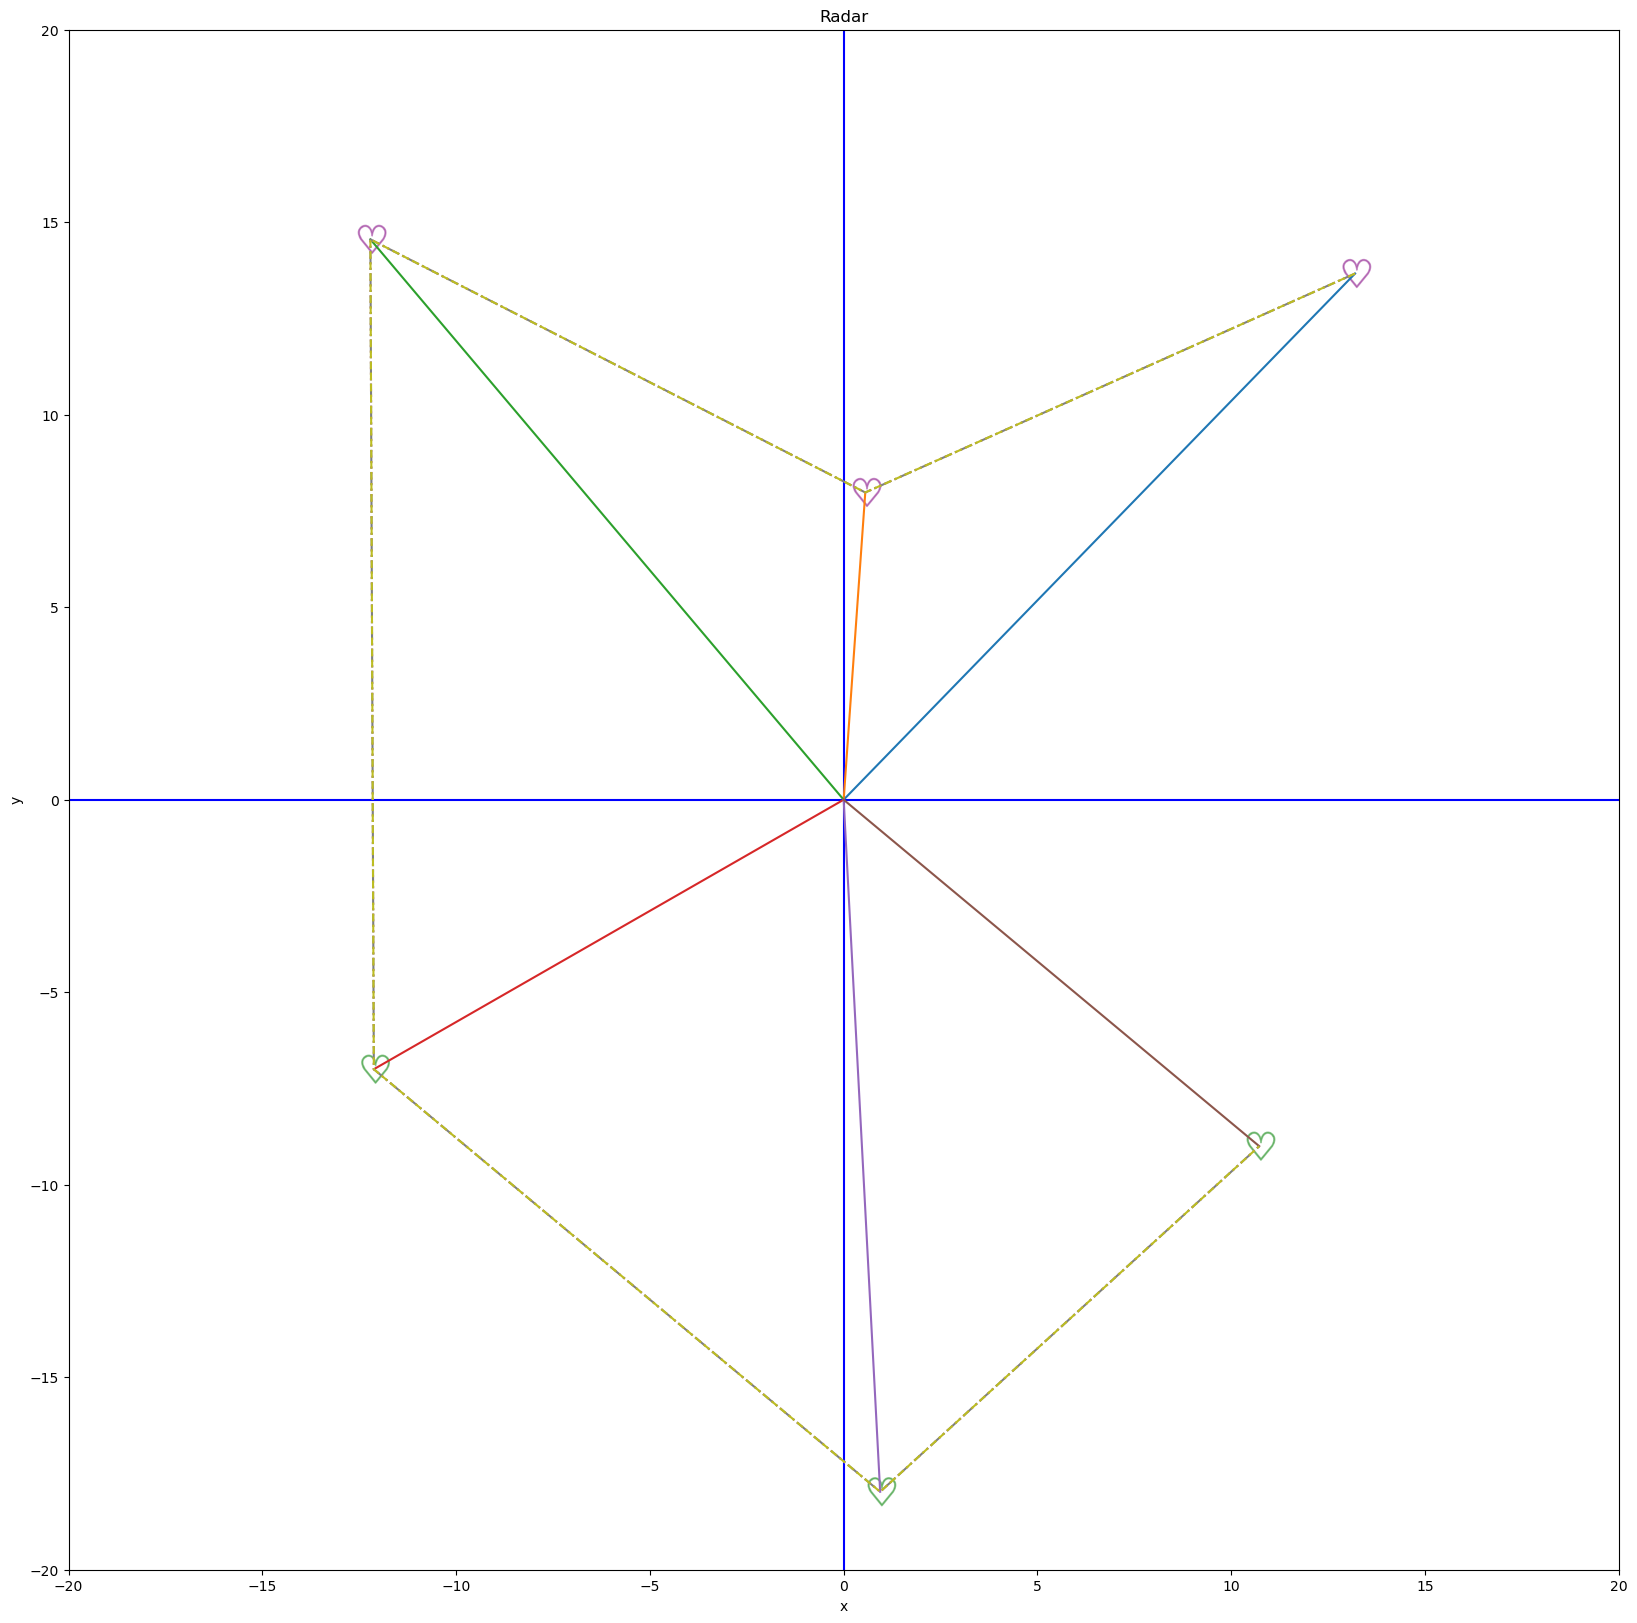

In [172]:
#Configuración del gráfico


fig, ax = plt.subplots(figsize = (20,20))

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title("Radar")

plt.hlines(0,-20,20, color="blue")
plt.vlines(0,-20,20, color="blue")

for n in range(0, len(lista), 1):
    plt.plot([0,x[n]],[0,y[n]])

#Configuración del color
color = np.where((xnp<= 0)  , "red", "blue") 
color = np.where((ynp <= 0)  , "green", "purple") 


plt.scatter(xnp, ynp, c=color, label=color, s=500, marker=r'$\heartsuit$', alpha=0.4 )
plt.plot(xnp, ynp, linestyle="dotted")
plt.plot(xnp, ynp, linestyle="dashdot")
plt.plot(xnp, ynp, linestyle="dashed")
plt.show()


In [173]:
#En este segmento de código se despliegan los datos obtenidos desde el puerto serial, objeto, grados, distancia.
#También se imprime las coordenadas cartesianas.
for n in range(0, len(lista), 1):
    print("Objeto: " , objeto[n])
    print("Distancia en la que se encuentra el objeto: ", distancia[n])
    print("Grados en la que se encuentra el objeto: " , grados[n])
    print("Coordenadas en el plano cartesiano: [ " , x[n] , " , " , y[n] , " ]")
    print("\n")
    


Objeto:  1
Distancia en la que se encuentra el objeto:  19
Grados en la que se encuentra el objeto:  46
Coordenadas en el plano cartesiano: [  13.198509038720948  ,  13.667456206434373  ]


Objeto:  2
Distancia en la que se encuentra el objeto:  8
Grados en la que se encuentra el objeto:  86
Coordenadas en el plano cartesiano: [  0.5580517899530019  ,  7.980512402078594  ]


Objeto:  3
Distancia en la que se encuentra el objeto:  19
Grados en la que se encuentra el objeto:  130
Coordenadas en el plano cartesiano: [  -12.212964584044247  ,  14.554844419260583  ]


Objeto:  4
Distancia en la que se encuentra el objeto:  14
Grados en la que se encuentra el objeto:  210
Coordenadas en el plano cartesiano: [  -12.12435565298214  ,  -7.000000000000002  ]


Objeto:  5
Distancia en la que se encuentra el objeto:  18
Grados en la que se encuentra el objeto:  273
Coordenadas en el plano cartesiano: [  0.942047212372991  ,  -17.975331625582328  ]


Objeto:  6
Distancia en la que se encuentra el o

In [174]:
#Para calcular la distancia entre dos objetos es importante crear todas las posibles combinaciones entre los objetos.
#Generamos algunas listas para las posibles combinaciones.
objetos=[]
combinaciones=[]
serieObjetos=[]

for n in range(1, len(lista)+1, 1):
    objetos.append(n)

for m in range(1, len(objetos)+1, 1):
    for n in range(1, len(objetos)+1, 1):
        serieObjetos.append(m)    
    
for m in range(1, len(lista)+1, 1):
    for n in range(1, len(lista)+1, 1):
        combinaciones.append(n)

print("objetos: ",objetos)
print("Serie objetos: ", serieObjetos)
print("combinaciones: ",combinaciones)



objetos:  [1, 2, 3, 4, 5, 6]
Serie objetos:  [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6]
combinaciones:  [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]


In [175]:
#Para continuar con las posibles combinaciones, llenamos las listas con todas las posibilidades.
posObjetosXY1=[]
posObjetosXY2=[]
combObjetosXY1=[]
combObjetosXY2=[]
combX1=[]
combX2=[]
combY1=[]
combY2=[]


combDistanciaObjetos=[]

for n in range(0, len(serieObjetos), 1):    
    print("Objeto: ",serieObjetos[n],"Posición objeto: ", objeto.index(serieObjetos[n]),"Coordenada x: ",x[objeto.index(serieObjetos[n])],"Coordenada y:",y[objeto.index(serieObjetos[n])])
    posObjetosXY1.append(objeto.index(serieObjetos[n]))
    combX1.append(x[objeto.index(serieObjetos[n])])    
    combY1.append(y[objeto.index(serieObjetos[n])])
combObjetosXY1.append(serieObjetos)

print("\n")
for m in range(0, len(combinaciones), 1):
    print("Objeto: ", combinaciones[m],"Posición objeto: ", objeto.index(combinaciones[m]),"Coordenada x: ",x[objeto.index(combinaciones[m])],"Coordenada y:",y[objeto.index(combinaciones[m])])
    posObjetosXY2.append(objeto.index(combinaciones[m]))
    combX2.append(x[objeto.index(combinaciones[m])])
    combY2.append(y[objeto.index(combinaciones[m])])
combObjetosXY2.append(combinaciones)

print("\n")

print("Combinación objetosXY1 : ",combObjetosXY1)
print("Posición objetosXY1 : ",posObjetosXY1)
print("x1:", combX1)
print("y1:", combY1)
print("\n")

print("Combinación objetosXY2 : ",combObjetosXY2)
print("Posición ObjetosXY2: ",posObjetosXY2)
print("x2:", combX2)
print("y2:", combY2)




Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  1 Posición objeto:  0 Coordenada x:  13.198509038720948 Coordenada y: 13.667456206434373
Objeto:  2 Posición objeto:  1 Coordenada x:  0.5580517899530019 Coordenada y: 7.980512402078594
Objeto:  2 Posición objeto:  1 Coordenada x:  0.5580517899530019 Coordenada y: 7.980512402078594
Objeto:  2 Posición objeto:  1 Coordenada x:  0.5580517899530019 Coordenada y: 7.980512402078594
Objeto:  2 Posición objeto:  1 Coordenada x:  0.5580517899530019 Coordenada y: 7.980512402078594
Objeto:  2 Posición obje

In [176]:
#En este segmento de código se calcula la distancia de todas las posibles combinaciones entre los objetos y
#se despliegan los resultados.
print(objetos)
print(x)
print(y)
print("\n")
print("\n")
for m in range(0, len(combinaciones), 1):
    print("\n")
    print("\n")
    combDistanciaObjetos.append(float(math.sqrt((combX1[m]-combX2[m])**2+(combY1[m]-combY2[m])**2)))
    print("Distancia: ", float(math.sqrt((combX1[m]-combX2[m])**2+(combY1[m]-combY2[m])**2)) )
    print("x1: ",combX1[m]," x2:", combX2[m], )
    print("y1: ",combY1[m]," y2:",combY2[m])
    print("\n")
    print("Objeto: ",serieObjetos[m])
    print("Posición objeto: ", objeto.index(serieObjetos[m]))
    print("Coordenada x: ",x[objeto.index(serieObjetos[m])])
    print("Coordenada y: ",y[objeto.index(serieObjetos[m])])
    print("\n")
    print("Objeto: ", combinaciones[m])
    print("Posición objeto: ", objeto.index(combinaciones[m]))
    print("Coordenada x: ",x[objeto.index(combinaciones[m])])
    print("Coordenada y:",y[objeto.index(combinaciones[m])])    
    
print(combDistanciaObjetos)
print("\n")



[1, 2, 3, 4, 5, 6]
[13.198509038720948, 0.5580517899530019, -12.212964584044247, -12.12435565298214, 0.942047212372991, 10.724622203665689]
[13.667456206434373, 7.980512402078594, 14.554844419260583, -7.000000000000002, -17.975331625582328, -8.999026535611554]








Distancia:  0.0
x1:  13.198509038720948  x2: 13.198509038720948
y1:  13.667456206434373  y2: 13.667456206434373


Objeto:  1
Posición objeto:  0
Coordenada x:  13.198509038720948
Coordenada y:  13.667456206434373


Objeto:  1
Posición objeto:  0
Coordenada x:  13.198509038720948
Coordenada y: 13.667456206434373




Distancia:  13.860825707432827
x1:  13.198509038720948  x2: 0.5580517899530019
y1:  13.667456206434373  y2: 7.980512402078594


Objeto:  1
Posición objeto:  0
Coordenada x:  13.198509038720948
Coordenada y:  13.667456206434373


Objeto:  2
Posición objeto:  1
Coordenada x:  0.5580517899530019
Coordenada y: 7.980512402078594




Distancia:  25.426963041636608
x1:  13.198509038720948  x2: -12.212964584044247
y1: 

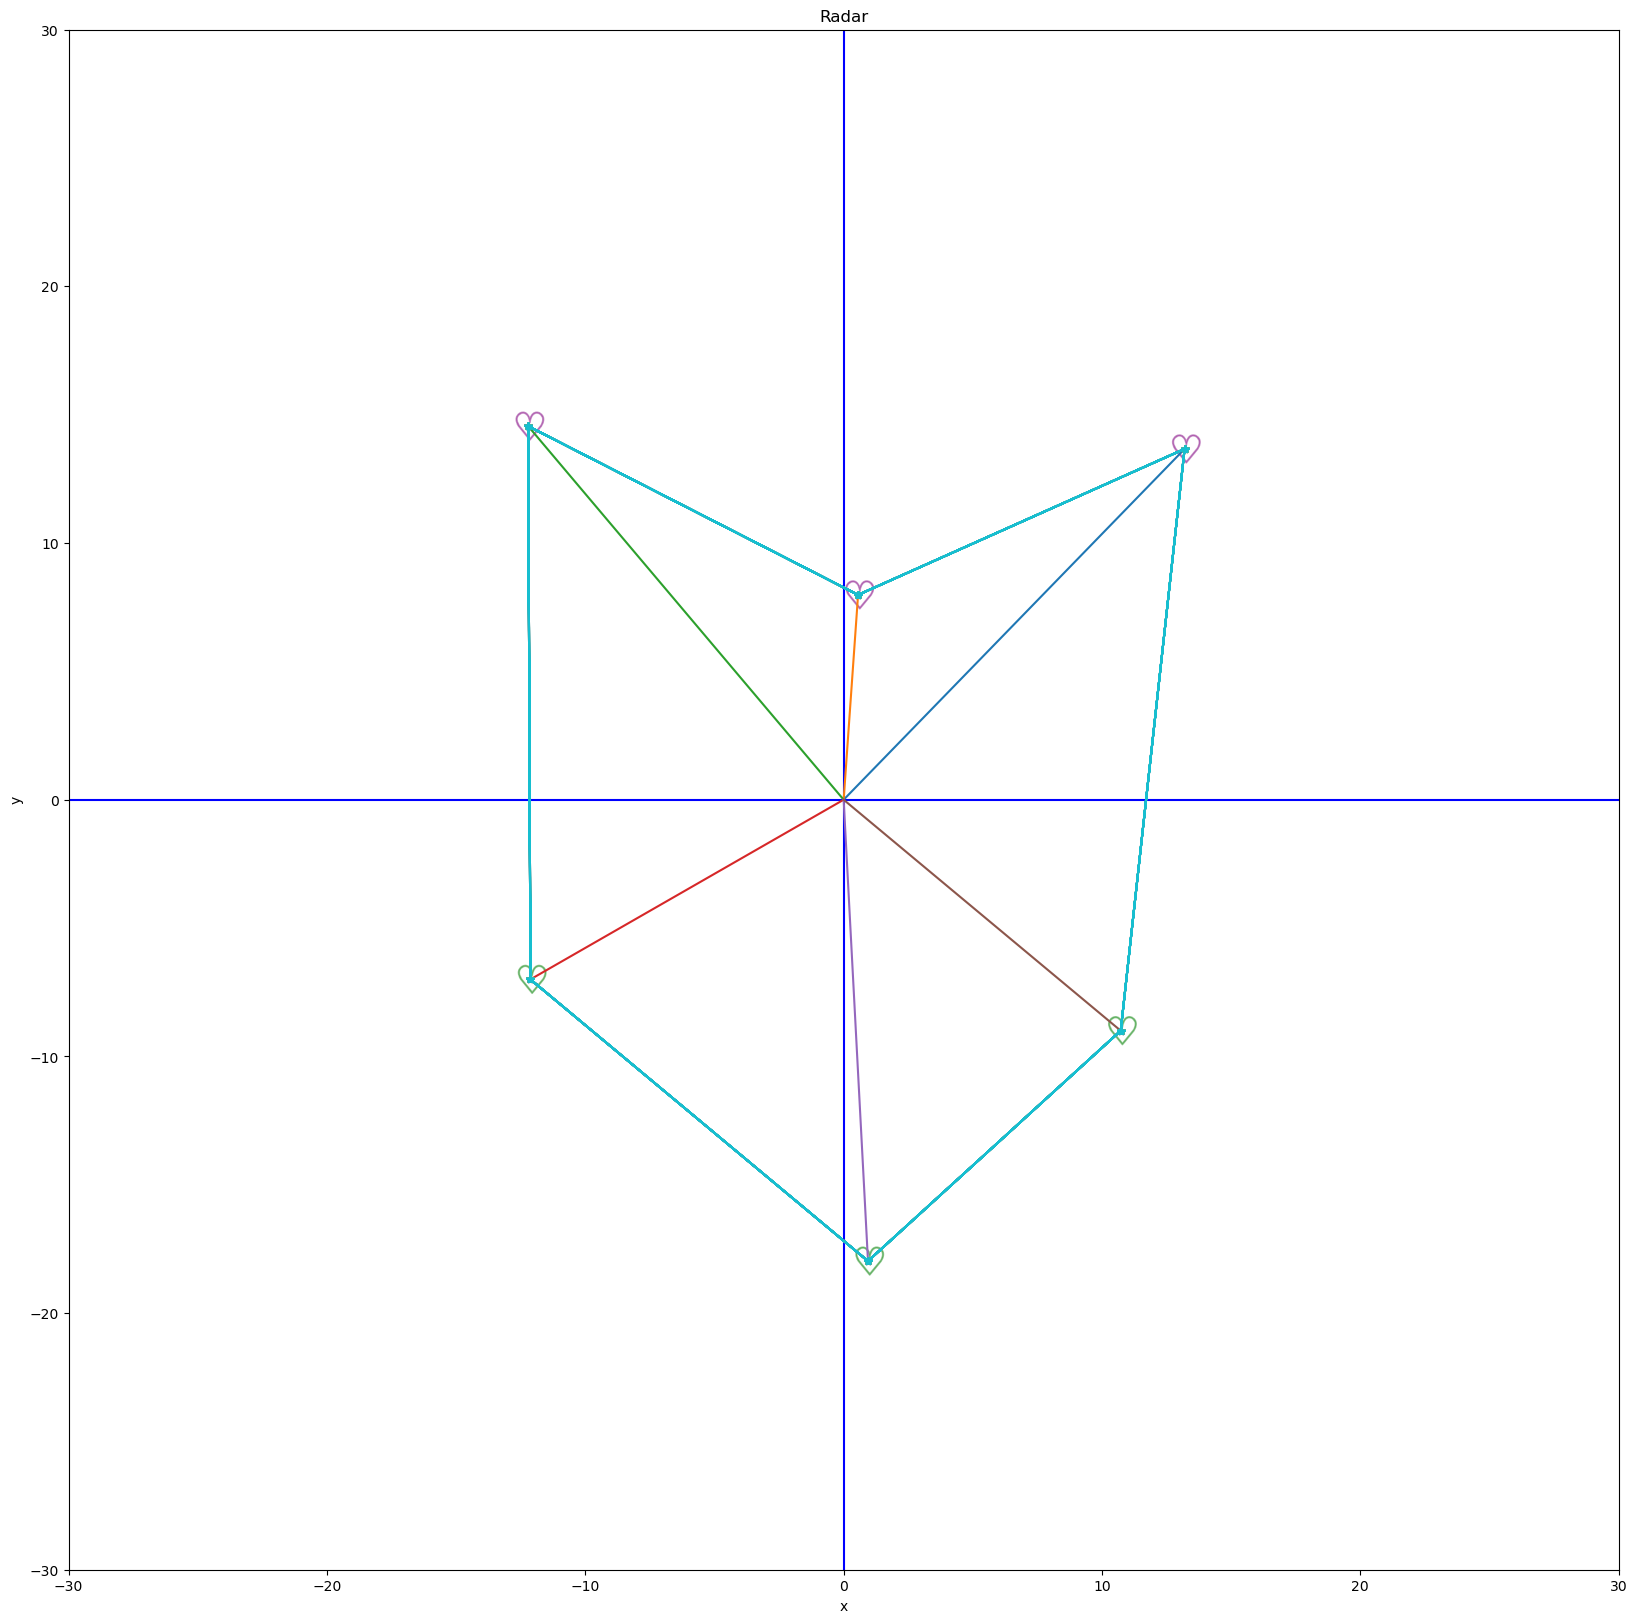

In [177]:
#Volvemos a graficar.

fig, ax = plt.subplots(figsize = (20,20))



plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.title("Radar")

plt.hlines(0,-30,30, color="blue")
plt.vlines(0,-30,30, color="blue")

for n in range(0, len(lista), 1):
    plt.plot([0,x[n]],[0,y[n]])

#Configuración del color
color = np.where((xnp<= 0)  , "red", "blue") 
color = np.where((ynp <= 0)  , "green", "purple") 


plt.scatter(xnp, ynp, c=color, label=color, s=500, marker=r'$\heartsuit$', alpha=0.4 )
ax.plot(combX1,combY1, marker='*')
ax.plot(combX2,combY2, marker='*')


ax.plot(combX1,combY1, marker='*')
ax.plot(combX2,combY2, marker='*')
plt.show()

